# Introduction

## Purpose of the project

## Data scraping

# Default columns

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values *above 0.5* are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **liveness**:
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value *above 0.8* provides strong likelihood that the track is live.

* **speechiness**:
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values *above 0.66* describe tracks that are probably made entirely of spoken words. Values *between 0.33 and 0.66* describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values *below 0.33* most likely represent music and other non-speech-like tracks.

* **valence**:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with *high valence* sound *more positive* (e.g. happy, cheerful, euphoric), while tracks with *low valence* sound *more negative* (e.g. sad, depressed, angry).

* **tempo**:
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

## Aim of the project

In [228]:
# importing useful libraries
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
sep = ";"

In [229]:
df = pd.read_csv('dataset.csv',sep=sep)

In [230]:
df.head()

,track_name,artists,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,year,ranking,critic score
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,5,-6.975,1,0.0342,0.724000,0.000000,0.1050,0.672,124.895,153867,4,60,2012,1,1
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,6,-9.853,0,0.0320,0.156000,0.000000,0.0479,0.334,115.876,175787,4,51,2012,1,1
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,11,-13.351,0,0.0962,0.654000,0.000009,0.0937,0.663,148.282,622000,4,63,1965,2,"0,997995992"
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,6,-11.644,0,0.0345,0.316000,0.797000,0.1100,0.190,102.026,356333,4,67,2000,3,"0,995991984"
4,when you sleep,my bloody valentine,loveless,0.399,0.866,6,-9.720,1,0.0558,0.000034,0.738000,0.0785,0.125,128.864,251947,4,62,1991,4,"0,993987976"


# Make simple statistics on critic score

In [231]:
df1 = df.drop(['time_signature','mode','key','liveness'],axis=1)
df1.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,popularity,year,ranking,critic score
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,153867,60,2012,1,1
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,175787,51,2012,1,1
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,622000,63,1965,2,"0,997995992"
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,356333,67,2000,3,"0,995991984"
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,251947,62,1991,4,"0,993987976"


# Pre-processed columns

These columns are relatively easy to discretize because they are not domain dependent attributes and we are able to use common hand techniques for generating the labels.


* **Release date**: Convert release date to the decade the album was released in order to discretize the value in order to obtain the **'Decade'** column. Then we proceeded to convert each discretized decade into a categorical column **'Era'** . For the labels we used some kind of intuition to determine the labels associated with each group of decade.  



In [232]:
df1['Decade'] = (10 * (df1['year'] // 10))
df1.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,popularity,year,ranking,critic score,Decade
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,153867,60,2012,1,1,2010
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,175787,51,2012,1,1,2010
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,622000,63,1965,2,"0,997995992",1960
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,356333,67,2000,3,"0,995991984",2000
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,251947,62,1991,4,"0,993987976",1990


In [233]:
#Printing the min and max values of Release date in order to better discretize the release date 
# column
print(np.min(df1['Decade']), np.max(df1['Decade']))

1920 2020


The rationale is:

- Albums released in a decade before the 1980s excluded are considered as *vintage*. This is a reasonable assumption considering 1970 was 50 years ago.

- Albums released in a decade after the 1980s included and before the 2000s included are considered as *modern*.

- Albums released in a decade after the 2000s **excluded** are considered as *contemporary*.

TODO: migliora labels

In [234]:
df1['era']=pd.cut(x=df1['Decade'], bins=[1910,1970,2000,2020], 
                        labels=["vintage","modern","contemporary"])


* **duration_ms**: Through a helper function we convert duration_ms into **'duration_min '**
 

### Approximate duration into minutes


The get_min function takes as input an int value in milliseconds and converts it into an integer
that corresponds to the nearest minute. For example, that means that if a duration in milliseconds 
is equal 3 minutes and 30 seconds it is approximated to the nearest minute which is 4.



In [235]:
def get_min(ms):
    minutes=float(ms/float(1000*60))%60.
    return int((round(minutes,0))
)

In [236]:
print(get_min(210000),'minutes') # 210000 milliseconds is equal to 3 minutes and 30 seconds
print(get_min(209000),'minutes') # 209000 milliseconds is equal to 3 minutes and 29 seconds

4 minutes
3 minutes


In [237]:
df1['duration_min'] =df1['duration_ms'].apply(lambda x: get_min(x)) # use apply function to use the get min function on every row of the get_min column
df1.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,popularity,year,ranking,critic score,Decade,Era,duration_min
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,153867,60,2012,1,1,2010,contemporary,3
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,175787,51,2012,1,1,2010,contemporary,3
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,622000,63,1965,2,"0,997995992",1960,vintage,10
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,356333,67,2000,3,"0,995991984",2000,modern,6
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,251947,62,1991,4,"0,993987976",1990,modern,4


Drop rows with songs that are too long

In [238]:
df1[df1['duration_min'] > 15]

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,popularity,year,ranking,critic score,Decade,Era,duration_min
181,The Dripping Tap,King Gizzard & The Lizard Wizard,Omnium Gatherum,0.188,0.942,-4.706,0.1910,0.000505,0.620,0.2310,179.248,1097013,55,2022,161,"0,679358717",2020,contemporary,18
295,Head On/Pill - Live in San Francisco '16,King Gizzard & The Lizard Wizard,Live in San Francisco '16,0.184,0.719,-9.043,0.0930,0.056900,0.197,0.1680,193.214,1350627,20,2020,266,"0,468937876",2020,contemporary,23
369,The Diamond Sea,Sonic Youth,Washing Machine,0.260,0.641,-8.696,0.0414,0.149000,0.293,0.0433,114.534,1177293,37,1995,339,"0,322645291",1990,modern,20


In [239]:
df2 = df1.drop(df1[df1.duration_min > 15].index,axis=0) 

Remove live songs

In [240]:
df3=df2.drop(df2[df2['album'].str.contains("live", case=False)].index,axis=0)

Drop already processed cells 

In [241]:
df4 = df3.drop(["year","duration_ms","duration_min","popularity","ranking"],axis=1)

In [242]:
# critic score was a string so we are casting it to a float
df4['critic score'] = df4['critic score'].str.replace(',','.') # change decimal to dot instead of comma
df4['critic score'] = df4['critic score'].astype(float)
df4.dtypes # Now critic score is a float      

track_name            object
artists               object
album                 object
danceability         float64
energy               float64
loudness             float64
speechiness          float64
acousticness         float64
instrumentalness     float64
valence              float64
tempo                float64
critic score         float64
Decade                 int64
Era                 category
dtype: object

# TOGLI QUESTO DOPO NUOVO CSV

---------------------------------

In [194]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[['popularity_scal']] = scaler.fit_transform(df2[['popularity']])

---------------------------------

We make 2 correlation plots because if we have both `critic score` and `popularity` the correlation plot is difficult to read. Also we drop already processed columns like `duration_ms`, `ranking`, `popularity`.

In [195]:
# drop non relevant columns
dfp=df2.drop(["duration_ms","year","popularity","critic score","ranking"],axis=1)

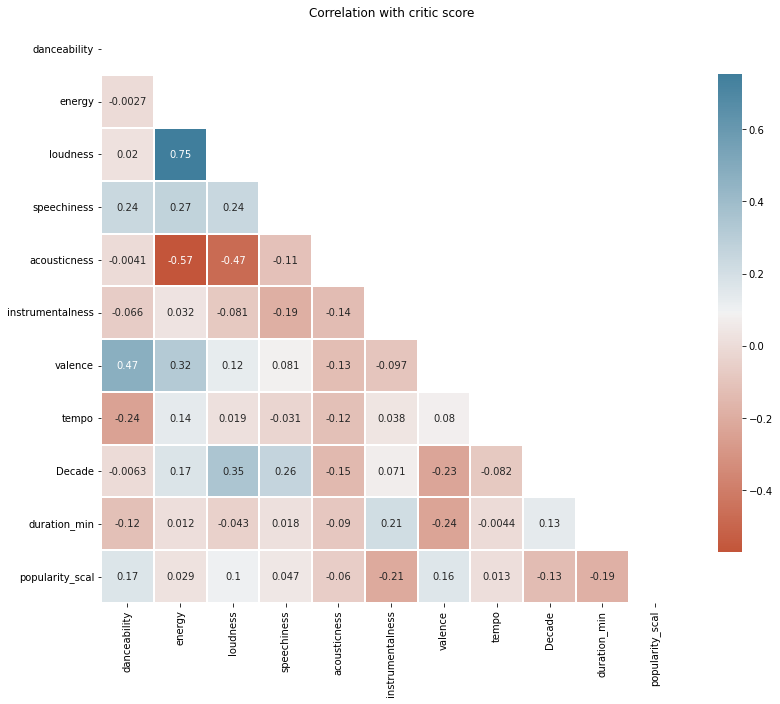

In [196]:
plt.figure(figsize=(13,11))
plt.title("Correlation with critic score")
corr = dfp.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_palette("Set2")
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap=sns.diverging_palette(20, 230, as_cmap=True),   
            square = True,                                 
            linewidths = 1.5,
            cbar_kws = {"shrink": .8});

In [198]:
dfc=df2.drop(["duration_ms","year","popularity","popularity_scal"],axis=1)

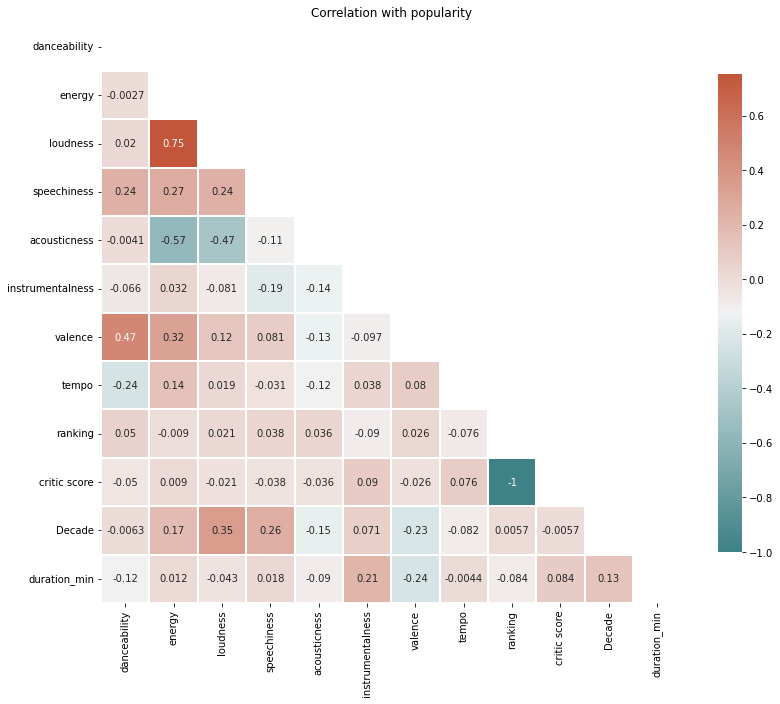

In [199]:


plt.figure(figsize=(13,11))
corr = dfc.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title("Correlation with popularity")
sns.set_palette("Set2")
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap=sns.diverging_palette(200, 20, as_cmap=True),   
            square = True,                                 
            linewidths = 1.5,
            cbar_kws = {"shrink": .8});

- loudness &rarr; energy
- year &rarr; energy 
- acousticness &rarr; loudness, energy 
- valence &rarr; danceability,energy

The correlation plot of `popularity` is particularly useful because it highlights a lot of relationship between our variables. Instead from the `critic score` plot we cannnot deduce any useful relation.

type(corr_mat)

In [205]:
corr_df = dfc.corr().abs() # we are interested in extracting the magnitude of the correlation

corr_ser = corr_df.unstack() # Convert the corr_df to a pandas series
corr_ser_so = corr_ser.sort_values(kind="quicksort",ascending=False)
corr_ser_so[(corr_ser_so < 0.9 ) & (corr_ser_so >= 0.10)].drop_duplicates()



loudness          energy              0.754051
acousticness      energy              0.571057
                  loudness            0.474788
danceability      valence             0.474150
Decade            loudness            0.348556
energy            valence             0.316167
                  speechiness         0.271381
speechiness       Decade              0.258126
                  loudness            0.242535
tempo             danceability        0.241476
danceability      speechiness         0.237682
duration_min      valence             0.235908
Decade            valence             0.230263
duration_min      instrumentalness    0.214456
instrumentalness  speechiness         0.188608
energy            Decade              0.172636
acousticness      Decade              0.151223
tempo             energy              0.137968
instrumentalness  acousticness        0.135602
Decade            duration_min        0.133018
valence           acousticness        0.130770
             

Inserisci le varie coppie

-------------------------

In [200]:
pal = sns.color_palette('Set2') # get colors for highlighting the quantiles
pal.as_hex()
pal.as_hex()[:]

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

## Discretization


Inserisci qui spiegazione sulla durata della canzone

Plots with standard quantiles

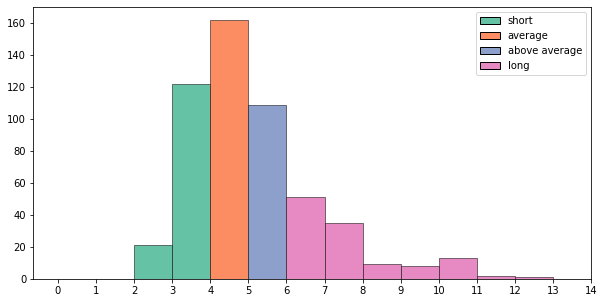

In [212]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (10,5))

cols = pal.as_hex()[:4] # save colors for labeling of quantiles


N, bins, patches = ax.hist(df2.duration_min,bins=range(14), edgecolor='black', linewidth=0.5)

#get standard the first, second and third quantile
quant_25, quant_50, quant_75= int(df2.duration_min.quantile(0.25)),int(df2.duration_min.quantile(0.50)),int(df2.duration_min.quantile(0.75))

# color each patch with one of the colors
for i in range(0,quant_25+1):
    patches[i].set_facecolor(cols[0])
for i in range(quant_25+1 ,quant_50+1):    
    patches[i].set_facecolor(cols[1])
for i in range(quant_50+1, quant_75+1):
    patches[i].set_facecolor(cols[2])
for i in range(quant_75+1, len(patches)):
    patches[i].set_facecolor(cols[3])

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in  cols]
labels= ["short","average","above average","long"] # labels we want to use for discretization
plt.xticks(np.arange(0, max(df2.duration_min), 1.0)) # set axis range
plt.legend(handles, labels)
plt.show()


Plots with standard values for song duration:
- a song duration below 3 minutes is considered as *short*
- a song duration between 3 and 4 minutes is considered as *average*
- a song duration between 4 and 6 minutes is *above average*
- a song duration above 6 is considered as *long*

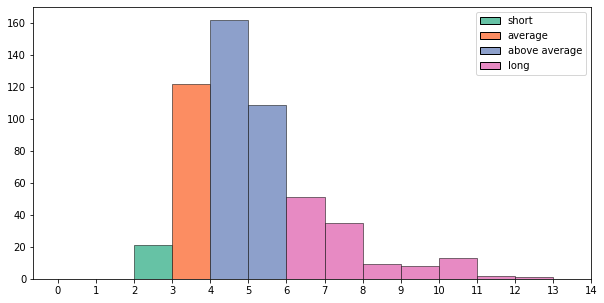

In [215]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (10,5))

cols = pal.as_hex()[:4]

N, bins, patches = ax.hist(df2.duration_min,bins=range(14), edgecolor='black', linewidth=0.5)

#

quant_03, quant_25, quant_75= int(df2.duration_min.quantile(0.03)),int(df2.duration_min.quantile(0.25)),int(df2.duration_min.quantile(0.75))
for i in range(0,3):
    patches[i].set_facecolor(cols[0])
for i in range(3 ,4):    
    patches[i].set_facecolor(cols[1])
for i in range(4, 6):
    patches[i].set_facecolor(cols[2])
for i in range(6, len(patches)):
    patches[i].set_facecolor(cols[3])

#create legend
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['b','r','orange','black']]
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in  cols]
labels= ["short","average","above average","long"]
plt.xticks(np.arange(0, max(df2.duration_min), 1.0))

plt.legend(handles, labels)

plt.show()


Now we proceed with the actual discretization, we have opted to not use quantiles here because we have a preexisting heuristics for song duration.

In [216]:
df2['dur']=pd.cut(x=df2['duration_min'],bins=[0,2,3,5,np.max(df2.duration_min)+1], 
                        labels=["short","average","above average","long"])

In [218]:
df2.head(10)

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,...,duration_ms,popularity,year,ranking,critic score,Decade,Era,duration_min,popularity_scal,dur
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,...,153867,60,2012,1,1.000000,2010,contemporary,3,0.6125,average
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,...,175787,51,2012,1,1.000000,2010,contemporary,3,0.5000,average
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,...,622000,63,1965,2,0.997996,1960,vintage,10,0.6500,long
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,...,356333,67,2000,3,0.995992,2000,modern,6,0.7000,long
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,...,251947,62,1991,4,0.993988,1990,modern,4,0.6375,above average
5,Running Up That Hill (A Deal With God),Kate Bush,Hounds Of Love,0.629,0.547,-13.123,0.0550,0.720000,0.003140,0.197,...,298933,91,1985,5,0.991984,1980,modern,5,1.0000,above average
6,Heroes - 2017 Remaster,David Bowie,"""Heroes"" (2017 Remaster)",0.489,0.758,-6.491,0.0297,0.000678,0.490000,0.435,...,371413,78,1977,6,0.989980,1970,vintage,6,0.8375,long
7,Strawberry Fields Forever,The Beatles,Love,0.383,0.558,-10.319,0.0514,0.030300,0.000040,0.207,...,271974,49,2006,7,0.987976,2000,modern,5,0.4750,above average
8,There Is a Light That Never Goes Out - 2011 Re...,The Smiths,The Queen Is Dead,0.523,0.769,-5.855,0.0269,0.040000,0.000000,0.876,...,244587,81,1986,8,0.985972,1980,modern,4,0.8750,above average
9,Life On Mars?,David Bowie,Licorice Pizza (Original Motion Picture Soundt...,0.459,0.528,-10.292,0.0376,0.646000,0.000069,0.260,...,232773,48,2021,9,0.983968,2020,contemporary,4,0.4625,above average


In [ ]:
# Drop unused columns
df2 = df1.drop(['year','duration_ms','duration_min','Decade'],axis=1)


In [ ]:
df1.head()


Create popularity_scal and critic score through min max scaling of respectively popularity and ranking.

In [ ]:
df1.dtypes

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# df2[['popularity_scal']] = scaler.fit_transform(df2[['popularity']])

In [ ]:
# df2.head()

### FIX graph

In [ ]:
df1.columns.tolist()

In [ ]:
easy_col =  df1.columns.tolist()[3:6] + df1.columns.tolist()[10:12] # get  'danceability', 'energy', 'loudness' and valence/tempo 3

In [ ]:
easy_col 

In [ ]:
strange_cols = list(set(df1.columns.tolist()[3:12]) - set(easy_col))

In [ ]:
strange_cols

In [ ]:
df1.head()

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize = (10,5))

cols = pal.as_hex()[:3]

N, bins, patches = ax.hist(df1.instrumentalness, edgecolor='black', linewidth=0.5)


quant_25= int(df1.instrumentalness.quantile(0.25))
quant_50=int(df1.instrumentalness.quantile(0.50))
# sns.histplot(x=df1.instrumentalness,palette="Set2");
# 0,0.05,0.4,.7,1
for i in np.arange(0,int(quant_25+0.01)):
    patches[i].set_facecolor(cols[0])
for i in np.arange(int(quant_25+0.01) ,int(quant_50+0.1)):    
    patches[i].set_facecolor(cols[1])
for i in np.arange(int(quant_50+0.01), len(patches)):
    patches[i].set_facecolor(cols[2])


#create legend
# handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['b','r','orange','black']]
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in  cols]
labels= ["low instrumental","highly instrumental","instrumental"]
plt.xticks(np.arange(0, max(df1.instrumentalness), 0.1))

plt.legend(handles, labels)

plt.show()


In [ ]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = [axis for subl in axes for axis in subl]
for col, ax in zip(strange_cols, axes):
    sns.histplot(x=col, data=df1, ax=ax)
    plt.xticks(np.arange(min(df1[col]), max(df1[col]), 1.0))




* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values *above 0.5* are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


In [ ]:
df1['instr']=pd.cut(x=df1['instrumentalness'], bins=[-.01,0.5,0.8,1], 
                        labels=["low instrumental","highly instrumental","instrumental"])


* **liveness**:
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value *above 0.8* provides strong likelihood that the track is live.

In [ ]:
df1['live']=pd.cut(x=df1['liveness'], bins=[-.01,0.5,0.8,1], 
                        labels=["studio recorded","low probability live","live"])


In [ ]:
df1[df1.isna().any(axis=1)]

* **speechiness**:
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values *above 0.66* describe tracks that are probably made entirely of spoken words. Values *between 0.33 and 0.66* describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values *below 0.33* most likely represent music and other non-speech-like tracks.



In [ ]:
df1['speech']=pd.cut(x=df1['speechiness'], bins=[-.01,0.33,0.66,1], 
                        labels=["non speech track","music/speech","spoken word"])


In [ ]:
df1[df1.isna().any(axis=1)]

## Normal cols

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15), sharey=True)
f.delaxes(axes[1,2]) 
axes = [axis for subl in axes for axis in subl]
for col, ax in zip(easy_col, axes):
    sns.histplot(x=col, data=df1, ax=ax)
    plt.xticks(np.arange(min(df1[col]), max(df1[col]), 1.0))
    if col == 'tempo':
        ax.set_xticks(range(0,len(col), 100))




* **valence**:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with *high valence* sound *more positive* (e.g. happy, cheerful, euphoric), while tracks with *low valence* sound *more negative* (e.g. sad, depressed, angry).


In [ ]:
quant_25_v, quant_50_v, quant_75_v= df2.valence.quantile(0.25),df2.valence.quantile(0.50),df2.valence.quantile(0.75)
quant_25_v, quant_50_v, quant_75_v

In [ ]:
df2['val']=pd.cut(x=df2['valence'], bins=[-.01,0.33,0.66,1], 
                        labels=["sad","neutral","euphoric"])



* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.




In [ ]:
df2['dan']=pd.cut(x=df2['danceability'], bins=[-1,0.33,0.66,1], 
                        labels=["least danceable","neutral"," most danceable"])


* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


In [ ]:
df2['aco']=pd.cut(x=df2['acousticness'], bins=[-.01,0.33,0.66,1], 
                        labels=["electronic","ele/ac","acoustic"])


* **tempo**:
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [ ]:
quant_25_t, quant_50_t, quant_75_t= int(df2.tempo.quantile(0.25)),int(df2.tempo.quantile(0.50)),int(df2.tempo.quantile(0.75))
quant_25_t, quant_50_t, quant_75_t

In [ ]:
np.min(df2.tempo), np.max(df2.tempo)

In [ ]:
df2['tem']=pd.cut(x=df2['tempo'], bins=[np.min(df2.tempo),quant_25_t,quant_75_t,np.max(df2.tempo)], 
                        labels=["slow tempo","medium tempo","high tempo"])


* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

In [ ]:
np.min(df2.loudness)

In [ ]:
quant_25, quant_50_l, quant_75= int(df2.loudness.quantile(0.25)),int(df2.loudness.quantile(0.50)),int(df2.loudness.quantile(0.75))
quant_25,quant_50_l,quant_75

In [ ]:
df2['loud']=pd.cut(x=df2['loudness'], bins=[np.min(df2.loudness),quant_25,quant_50_l,np.max(df2.loudness)], 
                        labels=["quiet","normal","loud"])


* **energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [ ]:
df2['ene']=pd.cut(x=df2['energy'], bins=[-.01,0.33,0.66,1], 
                        labels=["slow","medium","energic"])


1. Ranking &rarr; posizione classifica
3. Critic Score &rarr; augmented knowledge, min/max del ranking

* **Popularity**: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. 
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. 
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity

In [ ]:
df2['pop']=pd.cut(x=df2['popularity_scal'], bins=[-.01,0.33,0.66,1], 
                        labels=["not popular","middle","very popular"])

# Critic score is augmented


Cast critc score to float

In [ ]:

df2['critic score'] = df2['critic score'].str.replace(',','.')
df2['critic score'] = df2['critic score'].astype(float)
print(df2.dtypes)


In [ ]:
quant_25_c, quant_50_c, quant_75_c= round(df2['critic score'].quantile(0.25),2),round(df2['critic score'].quantile(0.50),2),round(df2['critic score'].quantile(0.75),2)
quant_25_c, quant_50_c, quant_75_c

In [ ]:
df2['crit']=pd.cut(x=df2['critic score'], bins=[-.01,quant_25_c,quant_75_c,1], 
                        labels=["not critically acclaimed","average critical","critically acclaimed"])

In [ ]:
df2.head()

In [ ]:
df2.columns.tolist()

In [ ]:
df3 = df2.drop(["danceability","energy","instrumentalness","speechiness", 'valence',
'loudness','acousticness','liveness','ranking','critic score', 'popularity','popularity_scal'
,'tempo'],axis=1)

In [ ]:
df3.columns.tolist()

In [ ]:
dft = df3.drop(['track_name','artists','album'],axis=1)

In [ ]:
_, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 30), sharey=True)
axes = [axis for subl in axes for axis in subl]
for col, ax in zip(dft.columns, axes):
    if col != 'crit':
        sns.countplot(x=col, hue="crit", data=dft, ax=ax, palette="Set2")

    else:
        sns.countplot(x=col, data=dft, ax=ax, palette="pastel")


In [ ]:
_, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 30), sharey=True)
axes = [axis for subl in axes for axis in subl]
for col, ax in zip(dft.columns, axes):
    if col != 'pop':
        sns.countplot(x=col, hue="pop", data=dft, ax=ax, palette="Set2")

    else:
        sns.countplot(x=col, data=dft, ax=ax, palette="Set2")


# Network structure

In [ ]:
df3.columns.tolist()

loud,Era,acoustic,

In order to restrict the scope of the project columns which are irrelevant and are too specific
to handle only attributes that have been considered particularly relevant were considered. 

From the preprocessing we have obtained the following discretization, the variables name have been shortened to make the network more compact. A description of each abbreviation for readibility.

- Year &rarr; 'Era',
- duration_ms &rarr; 'duration_min2',
- instrumentalness &rarr; 'instr',
- liveness &rarr; 'live',
- speechiness &rarr; 'speech',
- valence &rarr; 'val',
- danceability &rarr; 'dan',
- acousticness &rarr; 'aco',
- popularity &rarr; 'pop',
- critic score &rarr; 'crit',
- tempo &rarr; 'tem',
- loudness &rarr; 'loud',
- energy &rarr; 'ene'

Connections between nodes have been implemented firstly by looking at correlation between columns and also ...   

# Bayesian network example


Direct cause


Causal trail

Common effect

### Analyzing the network

1. Fai grafico con daft
2. esportalo in model (poi riscrivilo a mano il model)
3. 

In [ ]:
from pgmpy.models import BayesianModel 

In [ ]:
import daft
import matplotlib.pyplot as plt
from daft import PGM

- loudness &rarr; energy
- year &rarr; energy 
- acousticness &rarr; loudness, energy 
- valence &rarr; danceability,energy

In [ ]:
pgm = PGM(shape=[2, 2])

In [ ]:
pgm.add_node(daft.Node('loud', r"loud", 1, 1))
pgm.add_node(daft.Node('ene', r"ene", 1, 2))
pgm.add_edge('loud', 'ene')
pgm.render()
plt.show()

In [ ]:


pgm = PGM(shape=[6, 7])

pgm.add_node(daft.Node('Gen', r"Gen", 2, 6))
pgm.add_node(daft.Node('Age', r"Age", 1, 6))
pgm.add_node(daft.Node('CPK', r"CPK", 3, 6))
pgm.add_node(daft.Node('Smo', r"Smo", 4, 6))
pgm.add_node(daft.Node('Sod', r"Sod", 5, 6))


pgm.add_node(daft.Node('Ana', r"Ana", 2, 5))

pgm.add_node(daft.Node('Dia', r"Dia", 1, 3))
pgm.add_node(daft.Node('Blo', r"Blo", 3, 3))

pgm.add_node(daft.Node('Fai', r"Fai", 3, 2))

pgm.add_node(daft.Node('Eje', r"Eje", 2, 1))
pgm.add_node(daft.Node('Pla', r"Pla", 4, 1))

pgm.add_edge('Gen', 'CPK')
pgm.add_edge('Gen', 'Dia')
pgm.add_edge('Age', 'Dia')
pgm.add_edge('Age', 'Ana')
pgm.add_edge('Gen', 'Ana')
pgm.add_edge('Dia', 'Blo')
pgm.add_edge('CPK', 'Blo')
pgm.add_edge('Ana', 'Blo')
pgm.add_edge('Smo', 'Blo')
pgm.add_edge('Sod', 'Blo')
pgm.add_edge('Blo', 'Fai')
pgm.add_edge('Dia', 'Fai')
pgm.add_edge('Fai', 'Eje')
pgm.add_edge('Fai', 'Pla')

pgm.render()
plt.show()

In [ ]:


model1 = BayesianModel([('age', 'diabetes'),   ('age', 'anaemia'),   ('gender', 'diabetes'), ('gender', 'anaemia'), ('gender', 'creatinine_phosphokinase'),
                       ('anaemia', 'high_blood_pressure'),   ('diabetes', 'high_blood_pressure'), ('creatinine_phosphokinase', 'high_blood_pressure'),
                       ('smoking', 'high_blood_pressure'), ('serum_sodium', 'high_blood_pressure'),
                       ('diabetes', 'heart_failure'), ('high_blood_pressure', 'heart_failure'),
                       ('heart_failure', 'ejection_fraction'), ('heart_failure', 'platelets')])

In [ ]:
def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model

In [ ]:
model = convert_pgm_to_pgmpy(pgm)
model.edges()

In [ ]:
model1.edges()

### Parameter learning

##  Inferences

###  Exact Inference

The library provides 4 different heuristics:
* `MinFill`: the cost of removing the node is equal to the number of edges that need to be added to the network after its elimination.
* `MinNeighbors`: removing a node has a cost equal to the number of neighbors it has in the current architecture. 
* `MinWeight`: to every node is assigned a weight given by its domain cardinality; then, the cost of removing a node is equal to the product of the weights of its neighbors
* `WeightedMinFill`: to every edge is assigned a weight given by the product of the domain cardinality of its vertices; then, the cost of removing node A is given by the sum of the weights of the edges we'll need to add to the network after its elimination.


### Approximate Inference

###  Query 1:

###  Query 2: 